In [1]:
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('car_price_pred.csv')

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.describe

<bound method NDFrame.describe of              ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather int

In [11]:
data=data.sample(1000)

In [12]:
data.shape


(1000, 18)

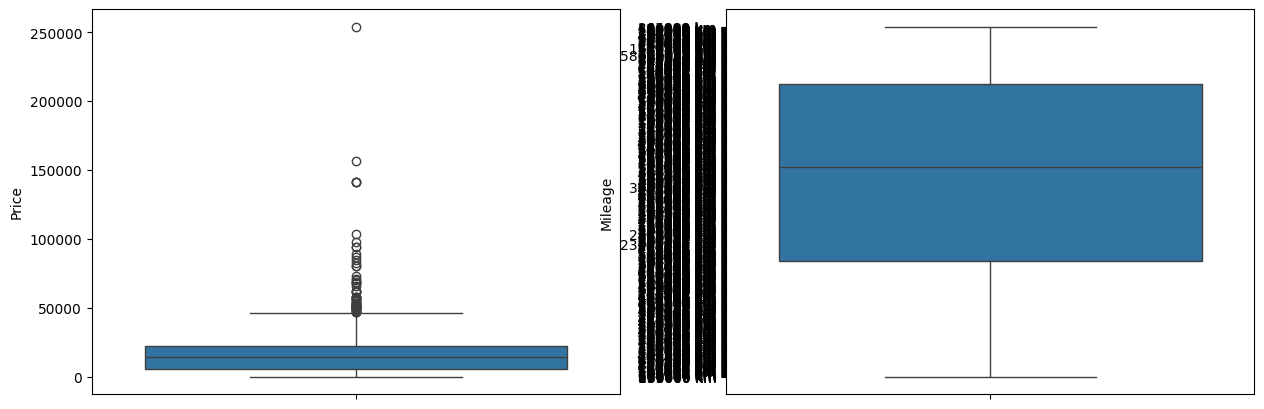

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['Price'])
plt.subplot(1,2,2)
sns.boxplot(y=data['Mileage'])
plt.show()

In [14]:
data=data[['Price','Manufacturer','Prod. year','Engine volume','Mileage']]

In [15]:
data.count

<bound method DataFrame.count of        Price Manufacturer  Prod. year Engine volume    Mileage
9492    5331   LAND ROVER        1999           1.8  204000 km
7003   21953       SUBARU        2016           2.5   63000 km
796    28241      HYUNDAI        2013           1.6   50015 km
14583  10349      HYUNDAI        2014             2  509460 km
5451   21012        DODGE        2012           3.6  160000 km
...      ...          ...         ...           ...        ...
6547    2901      HYUNDAI        2013           2.4  150440 km
2919   21169         FORD        2004             2  239000 km
7272   35438          BMW        2009     4.4 Turbo  960000 km
7264      30        HONDA        2005           1.3       0 km
17068   6899       NISSAN        2002           3.5  153000 km

[1000 rows x 5 columns]>

In [16]:
data.head()

,Price,Manufacturer,Prod. year,Engine volume,Mileage
9492,5331,LAND ROVER,1999,1.8,204000 km
7003,21953,SUBARU,2016,2.5,63000 km
796,28241,HYUNDAI,2013,1.6,50015 km
14583,10349,HYUNDAI,2014,2,509460 km
5451,21012,DODGE,2012,3.6,160000 km


In [17]:
data.columns=['price','manufac','prod. yr','engine v','mil']

In [18]:
data.head()

,price,manufac,prod. yr,engine v,mil
9492,5331,LAND ROVER,1999,1.8,204000 km
7003,21953,SUBARU,2016,2.5,63000 km
796,28241,HYUNDAI,2013,1.6,50015 km
14583,10349,HYUNDAI,2014,2,509460 km
5451,21012,DODGE,2012,3.6,160000 km


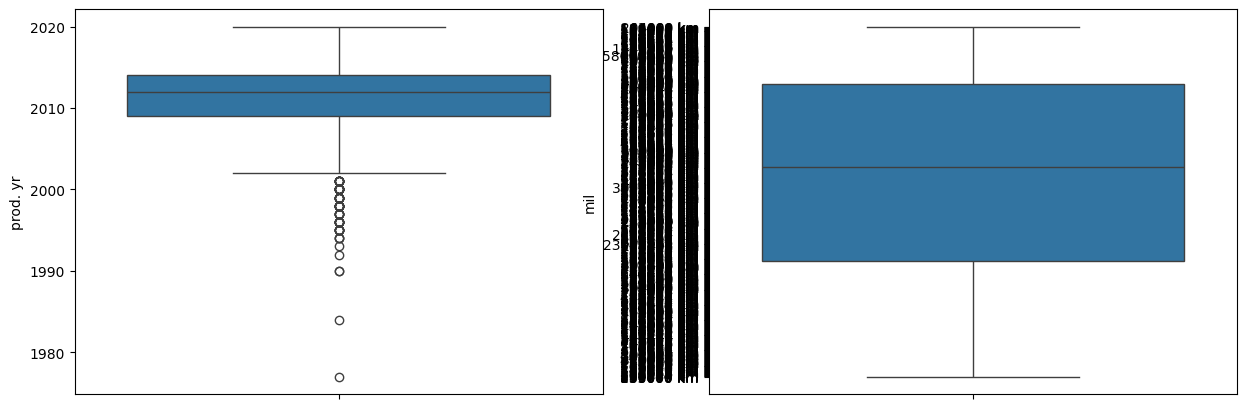

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['prod. yr'])
plt.subplot(1,2,2)
sns.boxplot(y=data['mil'])
plt.show()

In [21]:
q1,q3=data['prod. yr'].quantile([.25,.75])

In [22]:
q1

2009.0

In [23]:
q3

2014.0

In [24]:
IQR=(q3-q1)

In [25]:
lower=q1-1.5*(IQR)
upper=q3+1.5*(IQR)

In [26]:
lower

2001.5

In [27]:
upper

2021.5

In [34]:
data['prod. yr']=np.where(data['prod. yr']<lower,lower, data['prod. yr'])

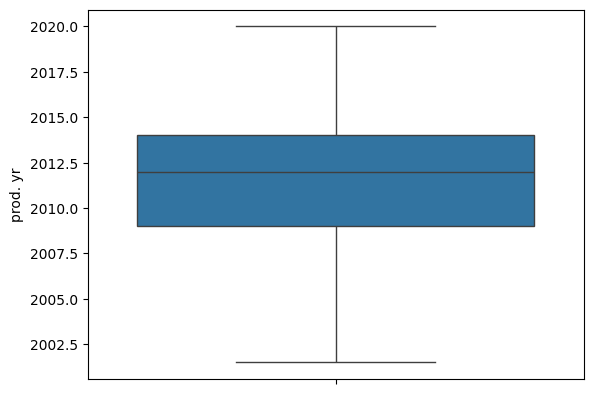

In [35]:
sns.boxplot(y=data['prod. yr'])
plt.show()

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x=data.drop('price',axis=1)  #independent

#all other col other than price are x
y=data['price']    #dependent

In [38]:
x.head()

,manufac,prod. yr,engine v,mil
9492,LAND ROVER,2001.5,1.8,204000 km
7003,SUBARU,2016.0,2.5,63000 km
796,HYUNDAI,2013.0,1.6,50015 km
14583,HYUNDAI,2014.0,2,509460 km
5451,DODGE,2012.0,3.6,160000 km


In [39]:
y.head()


9492      5331
7003     21953
796      28241
14583    10349
5451     21012
Name: price, dtype: int64

In [40]:
data.head()

,price,manufac,prod. yr,engine v,mil
9492,5331,LAND ROVER,2001.5,1.8,204000 km
7003,21953,SUBARU,2016.0,2.5,63000 km
796,28241,HYUNDAI,2013.0,1.6,50015 km
14583,10349,HYUNDAI,2014.0,2,509460 km
5451,21012,DODGE,2012.0,3.6,160000 km


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
x_train.head()

,manufac,prod. yr,engine v,mil
16873,BMW,2015.0,3.0 Turbo,56000 km
5154,MERCEDES-BENZ,2008.0,2.2 Turbo,200000 km
13691,KIA,2012.0,2,225307 km
4085,BMW,2001.5,2.2,200543 km
12483,TOYOTA,2008.0,1.5,111111 km


In [46]:
y_train.head()

16873    94083
5154       100
13691     1333
4085      8467
12483    12544
Name: price, dtype: int64

In [47]:
x_test.head()

,manufac,prod. yr,engine v,mil
14743,FORD,2001.5,2.5,100000 km
13130,TOYOTA,2007.0,1.5,194000 km
16357,TOYOTA,2012.0,2.5,64000 km
3097,HYUNDAI,2015.0,2,620755 km
14655,VOLKSWAGEN,2013.0,2.5,23184 km


In [48]:
y_test.head()

14743     9408
13130    10036
16357    27598
3097     10976
14655     1411
Name: price, dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression as lr

In [77]:
lr.fit(x_train,y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'